In [1]:
import torch
from translate import get_model, greedy_decode
from transformer.utils import draw_attentions

In [2]:
torch.manual_seed(99)
model, (src, trg), (test, test_loader) = get_model("./run-main.sh")
rand_idx = torch.randint(0, len(test), (1,))
rand_data = test.examples[rand_idx]

dec_tensor, attns_dict = greedy_decode(model, 
                                       max_length=50, 
                                       src_data=rand_data.src, 
                                       trg_data=rand_data.trg, 
                                       src_field=src, 
                                       trg_field=trg,
                                       dec_sos_idx=trg.vocab.stoi["<s>"], 
                                       dec_eos_idx=trg.vocab.stoi["</s>"],
                                       device="cuda")

## Test Translation

In [3]:
print("Source Sentence:")
print("  ","".join(rand_data.src).strip().replace("  ", " "))
print("Target Sentence:")
print("  ","".join(rand_data.trg).strip().replace("  ", " "))
print("Predicted Sentence:")
print("  ",trg.reverse(dec_tensor)[0])
print("Google Translated Sentence:")
print("  ","A woman in a blue top is running at a marathon.")

Source Sentence:
   a lady dressed in blue running a marathon .
Target Sentence:
   eine blau gekleidete frau läuft einen marathon .
Predicted Sentence:
   eine frau in einem blauen oberteil läuft bei einem marathon.
Google Translated Sentence:
   A woman in a blue top is running at a marathon.


------------------------------
 Layer 0


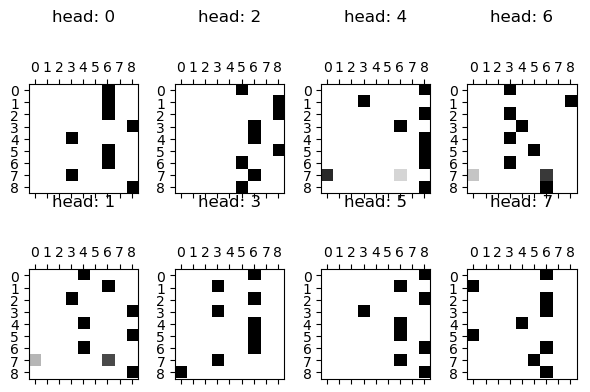

------------------------------
 Layer 1


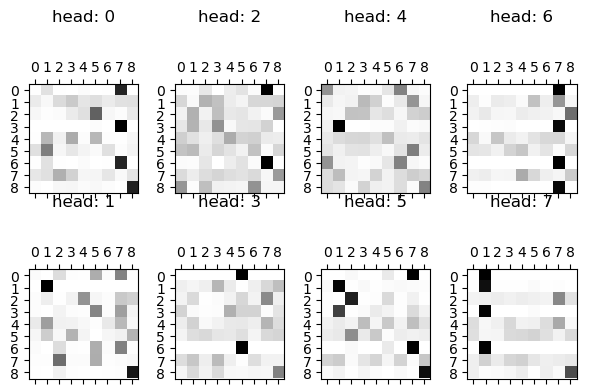

------------------------------
 Layer 2


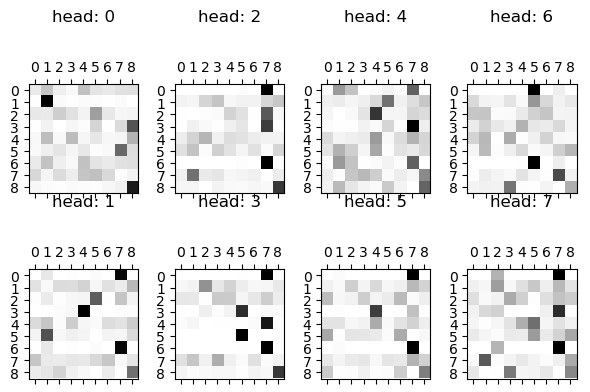

------------------------------
 Layer 3


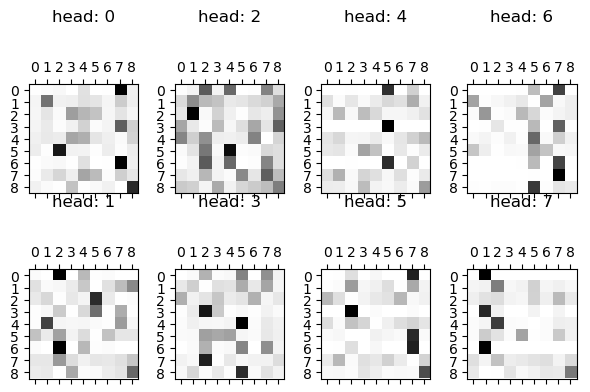

------------------------------
 Layer 4


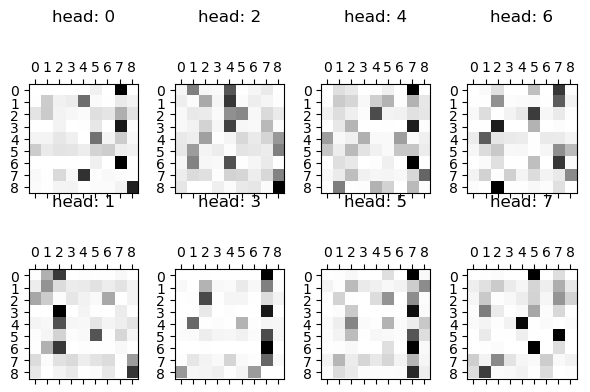

------------------------------
 Layer 5


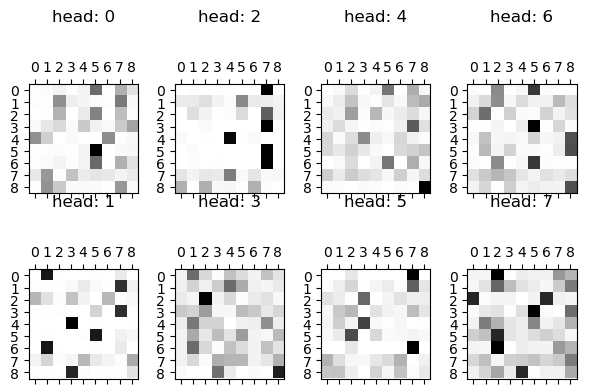

In [4]:
draw_str = "enc_self_attns"

for i in range(len(attns_dict[draw_str])):
    print(f"{'-'*30}\n Layer {i}")
    draw_attentions(n_head=8, attn=attns_dict[draw_str][i].cpu())

------------------------------
 Layer 0


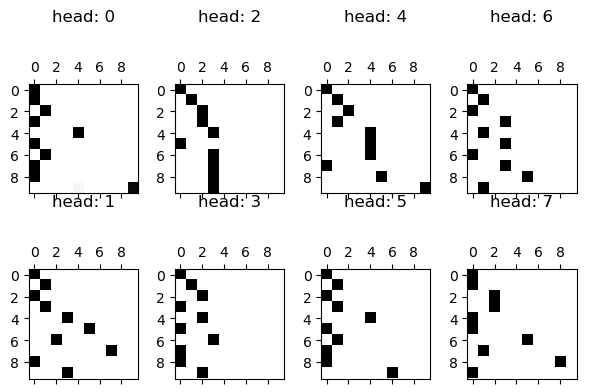

------------------------------
 Layer 1


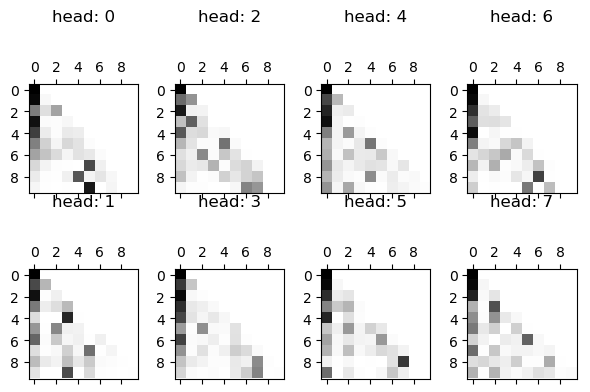

------------------------------
 Layer 2


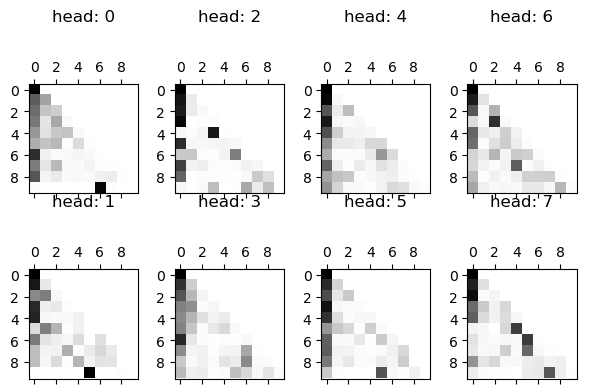

------------------------------
 Layer 3


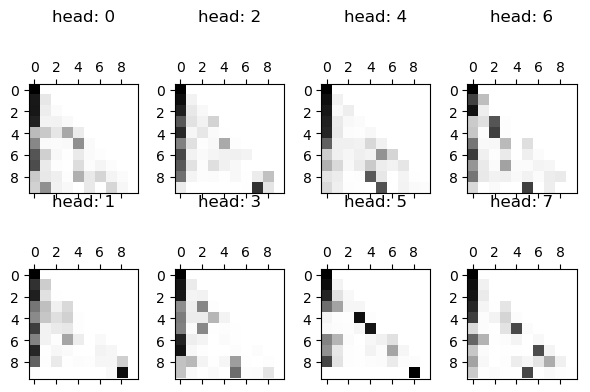

------------------------------
 Layer 4


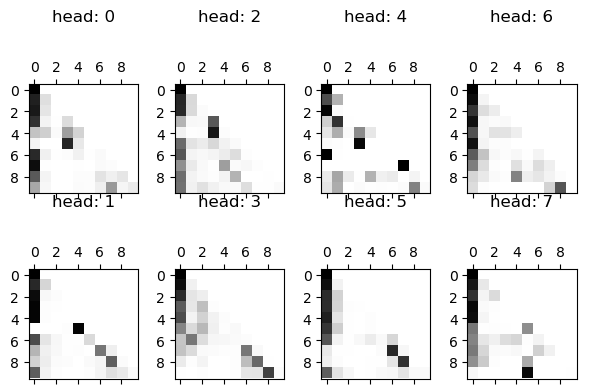

------------------------------
 Layer 5


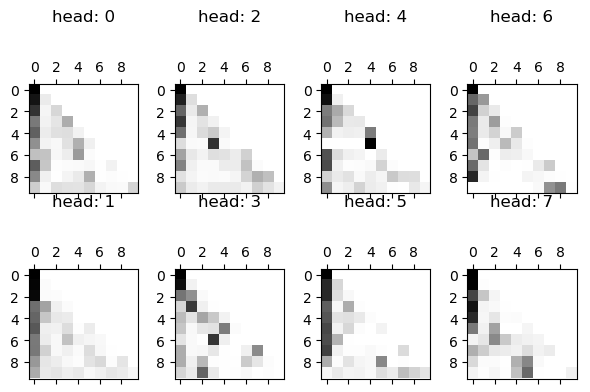

In [5]:
draw_str = "dec_self_attns"

for i in range(len(attns_dict[draw_str])):
    print(f"{'-'*30}\n Layer {i}")
    draw_attentions(n_head=8, attn=attns_dict[draw_str][i].cpu())

------------------------------
 Layer 0


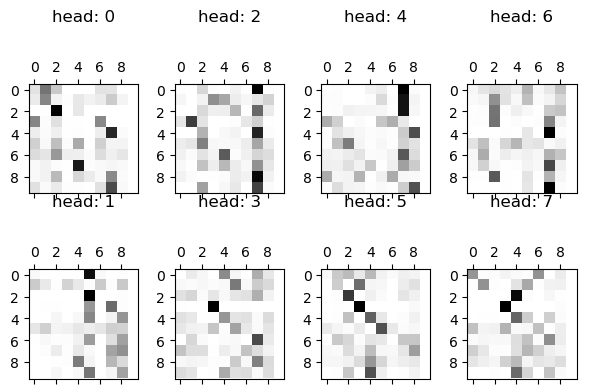

------------------------------
 Layer 1


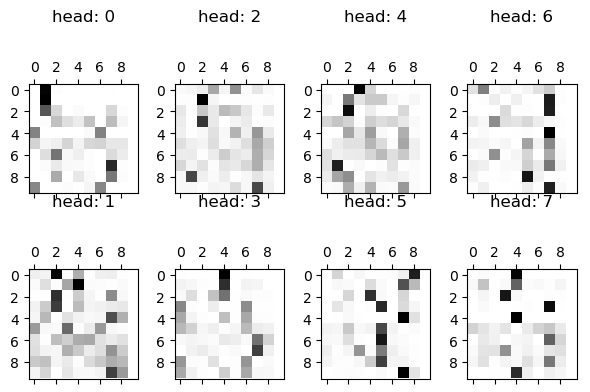

------------------------------
 Layer 2


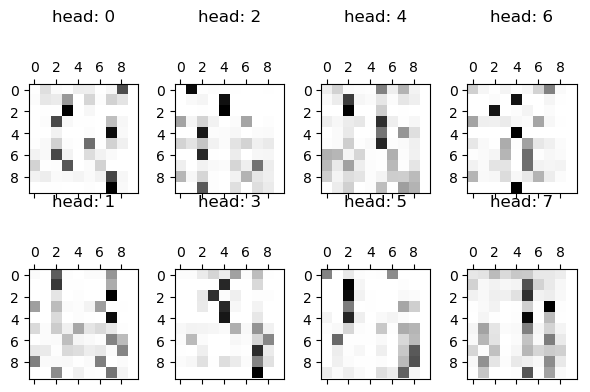

------------------------------
 Layer 3


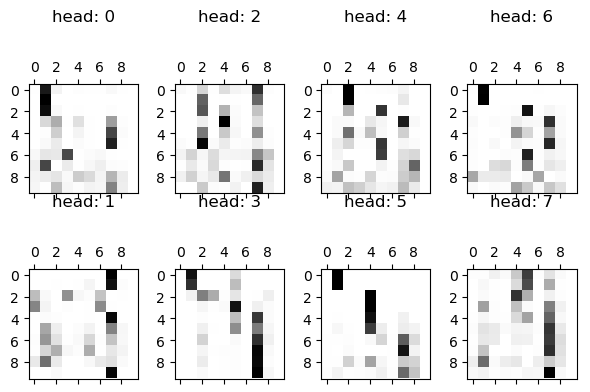

------------------------------
 Layer 4


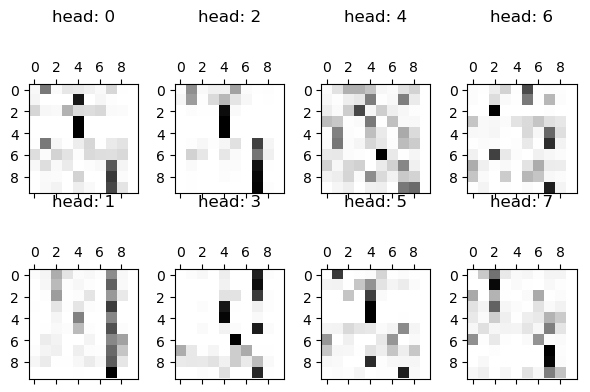

------------------------------
 Layer 5


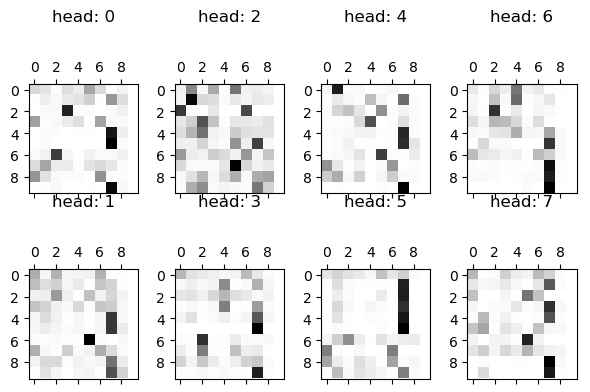

In [6]:
draw_str = "dec_enc_attns"

for i in range(len(attns_dict[draw_str])):
    print(f"{'-'*30}\n Layer {i}")
    draw_attentions(n_head=8, attn=attns_dict[draw_str][i].cpu())